# Agent Based Modelling

This file will run a simple calculation. For more complex calculations look at the function in the __init__.py

This code is messy and untested (although thats to be expected given the time limitations). I've just changed enough so its kinda unstandable but a lot needs to be done. There is a lot of repeated code (particularly in __init__.py) that could be cleaned up into simple methods, and I think some of the loops can be cleaned up, and some functions are on the wrong classes

__init__.py:
    this contains functions that can be used to run the simulation for a range of inputs

Master.py:
    - this creates the model, and orchestrates everything. Its in charge of:
    - creating the nanoparticles, receptors and ligands
    - making everything move around
    - checking for collisions
    - deciding whether bonding occurs
    - making sure no two things are in the same place

NanoparticleModel.py (should be renamed Nanoparticle.py):
    this represents the nanoparticles in the simulation. It create the ligands and moves around

ReceptorModel.py (should be renamed Receptor.py):
    this represents the receptors in the simulation. It moves around.

LigandModel.py (should be renamed Ligand.py):
    this represents the ligands in the simulation.

test_*:
    these are unit tests. They are little pieces of code that will take a function on another piece of code, run it, and test its output against expected values. This is the best way to make sure our code does what we expect. 


## Coding Tasks

The key coding tasks to be done is to clean up the code. Any logic relating to the ligand should be moved to the ligand class, etc. Also any logic that is duplicated should be moved to a base class https://www.w3schools.com/python/python_inheritance.asp. This should make the code much easier to read and understnad. We can then go about making changes.

The code also needs unit testing. -- need to merge in changes before starting on this.

In [10]:
dimension = 1000 ## the size of the simulation area in nm
binding_energy = 5 # in kT
number_of_nanoparticles=190
number_of_ligands=100
nanoparticle_radius=50
ligand_length=7
number_of_receptors=1000
receptor_length=100
number_of_seconds=10e-3
time_step=10e-3
binding_distance=4

### Run

In [12]:
from Master import Master

 

model = Master(dimension, binding_energy, time_step, number_of_receptors, receptor_length,
                 number_of_nanoparticles, nanoparticle_radius, number_of_ligands, ligand_length, binding_distance)
model.create_receptors()  # 100 nm for receptor
model.create_nanoparticles_and_ligands()  # 1-2 nm for ligand  # 95 particles

model.run(int(time_step*number_of_seconds))  # 3600 for 1 hour


There are 0 nanoparticles bound to the surface
There are 0 receptors bound to nanoparticles


There were 0 reactions


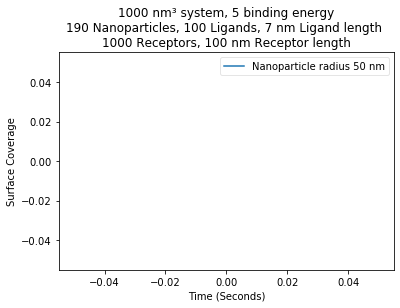

In [15]:
import matplotlib.pyplot as plt

print(f'There were {model.count} reactions')
plt.subplot()
plt.title(f'{model.dimension} nm\u00b3 system, {model.binding_energy} binding energy\n'
            f'{model.number_of_nanoparticles} Nanoparticles, {model.number_of_ligands} Ligands, {model.ligand_length} nm Ligand length \n'
            f'{model.number_of_receptors} Receptors, {model.receptor_length} nm Receptor length')
plt.xlabel('Time (Seconds)')
plt.ylabel('Surface Coverage')
plt.plot(list(range(0, model.time+1)), model.coverage, label=f'Nanoparticle radius {model.nanoparticle_radius} nm')

leg = plt.legend(loc='best', ncol=2)
leg.get_frame().set_alpha(0.5)
plt.show()